In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../data/aapl_prices.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1255 non-null   object
 1   Close   1256 non-null   object
 2   High    1256 non-null   object
 3   Low     1256 non-null   object
 4   Open    1256 non-null   object
 5   Volume  1256 non-null   object
dtypes: object(6)
memory usage: 59.0+ KB


In [3]:
df["Date"]=pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1255 non-null   datetime64[ns]
 1   Close   1256 non-null   object        
 2   High    1256 non-null   object        
 3   Low     1256 non-null   object        
 4   Open    1256 non-null   object        
 5   Volume  1256 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 59.0+ KB


In [4]:
df["Close"] = pd.to_numeric(df["Close"], errors="coerce")

In [5]:
df["daily_return"] = df["Close"].pct_change(fill_method=None)
df[["Date", "Close", "daily_return"]].head()

,Date,Close,daily_return
0,2021-01-04,125.974480,NaN
1,2021-01-05,127.531990,0.012364
2,2021-01-06,123.239052,-0.033662
3,2021-01-07,127.444359,0.034123
4,2021-01-08,128.544418,0.008632


In [6]:
df["vol_7d"] = df["daily_return"].rolling(window=7).std()
df["vol_30d"] = df["daily_return"].rolling(window=30).std()
df["vol_90d"] = df["daily_return"].rolling(window=90).std()

df[["Date", "vol_7d", "vol_30d", "vol_90d"]].head(15)

,Date,vol_7d,vol_30d,vol_90d
0,2021-01-04,NaN,NaN,NaN
1,2021-01-05,NaN,NaN,NaN
2,2021-01-06,NaN,NaN,NaN
3,2021-01-07,NaN,NaN,NaN
4,2021-01-08,NaN,NaN,NaN
5,2021-01-11,NaN,NaN,NaN
6,2021-01-12,NaN,NaN,NaN
7,2021-01-13,0.023475,NaN,NaN
8,2021-01-14,0.023723,NaN,NaN
9,2021-01-15,0.020239,NaN,NaN


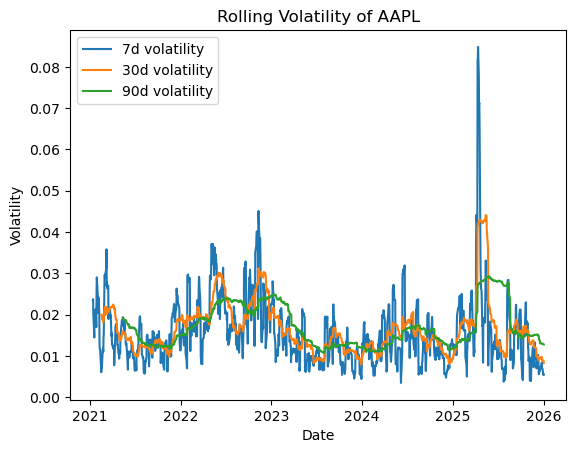

In [7]:
plt.figure()
plt.plot(df["Date"], df["vol_7d"], label="7d volatility")
plt.plot(df["Date"], df["vol_30d"], label="30d volatility")
plt.plot(df["Date"], df["vol_90d"], label="90d volatility")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Rolling Volatility of AAPL")
plt.show()

In [8]:
df["ma_30"] = df["Close"].rolling(window=30).mean()
df["ma_90"] = df["Close"].rolling(window=90).mean()

df[["Date", "Close", "ma_30", "ma_90"]].head(100)

,Date,Close,ma_30,ma_90
0,2021-01-04,125.974480,NaN,NaN
1,2021-01-05,127.531990,NaN,NaN
2,2021-01-06,123.239052,NaN,NaN
3,2021-01-07,127.444359,NaN,NaN
4,2021-01-08,128.544418,NaN,NaN
...,...,...,...,...
95,2021-05-20,124.326225,127.269306,125.624092
96,2021-05-21,122.490280,127.030228,125.591976
97,2021-05-24,124.121147,126.902707,125.555376
98,2021-05-25,123.925858,126.665011,125.538021


In [9]:
df["price_above_ma_30"] = df["Close"] > df["ma_30"]
df["price_above_ma_90"] = df["Close"] > df["ma_90"]

df[["Date", "price_above_ma_30", "price_above_ma_90"]].tail()

,Date,price_above_ma_30,price_above_ma_90
1251,2025-12-26,False,True
1252,2025-12-29,False,True
1253,2025-12-30,False,True
1254,2025-12-31,False,True
1255,NaT,False,False


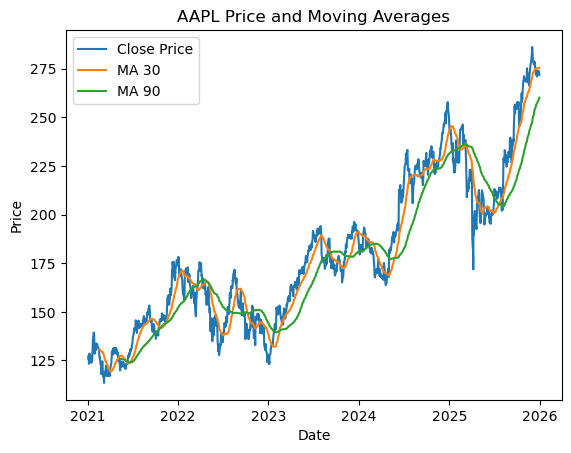

In [10]:
plt.figure()
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.plot(df["Date"], df["ma_30"], label="MA 30")
plt.plot(df["Date"], df["ma_90"], label="MA 90")
plt.legend()
plt.title("AAPL Price and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [11]:
df["cum_max"] = df["Close"].cummax()

In [12]:
df["drawdown"] = (df["Close"] - df["cum_max"]) / df["cum_max"]

df[["Date", "Close", "cum_max", "drawdown"]].head()

,Date,Close,cum_max,drawdown
0,2021-01-04,125.974480,125.974480,0.000000
1,2021-01-05,127.531990,127.531990,0.000000
2,2021-01-06,123.239052,127.531990,-0.033662
3,2021-01-07,127.444359,127.531990,-0.000687
4,2021-01-08,128.544418,128.544418,0.000000


In [13]:
df["is_in_drawdown"] = df["drawdown"] < 0

df[["Date", "drawdown", "is_in_drawdown"]].tail()

,Date,drawdown,is_in_drawdown
1251,2025-12-26,-0.044691,True
1252,2025-12-29,-0.043433,True
1253,2025-12-30,-0.045809,True
1254,2025-12-31,-0.050072,True
1255,NaT,NaN,False


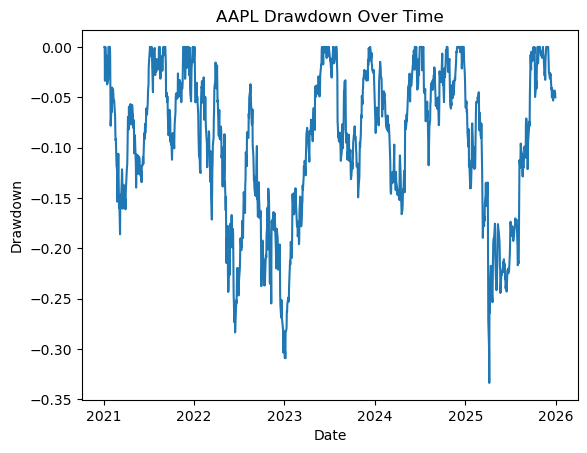

In [14]:
plt.figure()
plt.plot(df["Date"], df["drawdown"])
plt.title("AAPL Drawdown Over Time")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.show()

In [15]:
vol_threshold = df["vol_30d"].median()

df["high_volatility"] = df["vol_30d"] > vol_threshold

df[["Date", "vol_30d", "high_volatility"]].tail()

,Date,vol_30d,high_volatility
1251,2025-12-26,0.008893,False
1252,2025-12-29,0.008888,False
1253,2025-12-30,0.008892,False
1254,2025-12-31,0.008249,False
1255,NaT,NaN,False


In [16]:
df.groupby("high_volatility")["daily_return"].mean()

high_volatility
False    0.000851
True     0.000678
Name: daily_return, dtype: float64

In [17]:
df.groupby("price_above_ma_90")["daily_return"].mean()

price_above_ma_90
False   -0.001295
True     0.002176
Name: daily_return, dtype: float64

In [18]:
df["is_in_drawdown"].mean()

np.float64(0.928343949044586)

In [19]:
df.groupby("is_in_drawdown")["daily_return"].mean()

is_in_drawdown
False    0.013455
True    -0.000191
Name: daily_return, dtype: float64

## Feature-Based Insights

- Periods of high volatility are associated with increased risk but not necessarily higher average returns.
- Average returns tend to be higher when the price is above its long-term moving average, supporting momentum-based insights.
- The stock spends a significant portion of time in drawdown, highlighting the importance of downside risk analysis.

## Final Conclusions

- Return-based analysis confirms that Apple demonstrates positive long-term performance, but returns vary significantly across regimes.
- Volatility is time-varying and clusters during stress periods, reinforcing the need for rolling risk measures.
- Momentum features show that average returns tend to be higher when the price trades above long-term moving averages.
- The stock spends the majority of time below its historical peak, indicating that drawdowns are a normal condition even for strong assets.
- These insights highlight the importance of combining performance and downside risk metrics when analyzing financial time series.